In [2]:
#add project directory to python path
import sys
sys.path.append("..")
#import standard packages
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function, division
%matplotlib inline
from default import PROJECT_DIRECTORY, DATA_DIRECTORY

#Orphan Galaxies

Examine the effect of orpahn galaxies on clustering in SHAM models.

##Load Simulation Data

In [4]:
#load dark matter simulation
from halotools import sim_manager

#load halo catalogue to populate for mocks
simname = 'bolshoi_250'
halocat_1 = sim_manager.CachedHaloCatalog(simname = 'bolshoi_250', redshift=0.0, dz_tol=0.001,
                                          version_name='custom_w_clones_sub', halo_finder='Rockstar')

#print out column names
for name in halocat_1.halo_table.colnames: print(name)
print("number of (sub-)haloes: ", len(halocat_1.halo_table))

halo_upid
halo_first_acc_mvir
halo_acc_scale
halo_rvir
halo_vpeak
halo_macc
halo_first_acc_scale
halo_vy
halo_clone
halo_donor_ind
halo_half_mass_scale
halo_mvir
halo_T/|U|
halo_vmax_at_mpeak
halo_hostid
halo_y
halo_pid
halo_x
halo_z
halo_m200b
halo_m200c
halo_mvir_host_halo
halo_first_acc_vmax
halo_mpeak_scale
halo_vmax
halo_vacc
halo_nfw_conc
halo_id
halo_vx
halo_mpeak
halo_vz
halo_rs
number of (sub-)haloes:  19301666


In [5]:
#load dark matter simulation
from halotools import sim_manager

halocat_2 = sim_manager.CachedHaloCatalog(simname = 'bolshoi_250', redshift=0.0, dz_tol=0.001,
                                          version_name='custom_w_clones_ptcl', halo_finder='Rockstar')

#print out column names
for name in halocat_2.halo_table.colnames: print(name)
print("number of (sub-)haloes: ", len(halocat_2.halo_table))
print(" ")

halo_upid
halo_first_acc_mvir
halo_acc_scale
halo_rvir
halo_vpeak
halo_macc
halo_first_acc_scale
halo_vy
halo_clone
halo_donor_ind
halo_half_mass_scale
halo_mvir
halo_T/|U|
halo_vmax_at_mpeak
halo_hostid
halo_y
halo_pid
halo_x
halo_z
halo_m200b
halo_m200c
halo_mvir_host_halo
halo_first_acc_vmax
halo_mpeak_scale
halo_vmax
halo_vacc
halo_nfw_conc
halo_id
halo_vx
halo_mpeak
halo_vz
halo_rs
number of (sub-)haloes:  19301666
 


In [6]:
#set cosmology
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.27) #Bolshoi cosmology

##Define SHAM Models

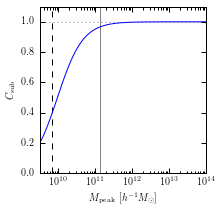

In [7]:
from halotools.empirical_models import SubhaloModelFactory
from Halo_model_components import Orphans, HaloProps

#define galaxy selection
def galaxy_selection_func(table):
    mask = (table['stellar_mass'] >= 10**9.5) & (table['remove'] == 0)
    return mask

#carry over halo properties from the halo table
additional_halo_properties = HaloProps(['halo_mpeak','halo_vpeak',
                                        'halo_half_mass_scale',
                                        'halo_acc_scale'])

prim_haloprop_key = 'halo_mpeak'
mass_key = 'halo_mpeak'

orphan_model = Orphans(prim_haloprop_key = mass_key)
orphan_model.param_dict['c_m0'] = 9.97963619845
orphan_model.param_dict['c_gamma'] = 1.26550335196

m_sample = np.logspace(9.0,15.0,100)
fig = plt.figure(figsize=(3.3,3.3))
ax = fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
plt.plot([50*halocat_1.particle_mass,50*halocat_1.particle_mass],[0.0,1.1], '--', color='black')
plt.plot([1000*halocat_1.particle_mass,1000*halocat_1.particle_mass],[0.0,2.0],
         '-', color='grey')
plt.plot([10**9,10**16],[1.0,1.0], ':', color='grey')
plt.plot(m_sample, orphan_model.subhalo_completeness(m_sample))
plt.xscale('log')
plt.xlim([10**9.5,10**14])
plt.ylim([0,1.1])
plt.xlabel(r'$M_{\rm peak}~[h^{-1}M_{\odot}]$')
plt.ylabel(r'$C_{\rm sub}$')
plt.show()

###Rank Order AM on Mpeak (model #1)

In [8]:
#load base models
from beyond_age_matching.make_mocks.model_components import RankSmHm

#build model
mstar_model = RankSmHm(prim_haloprop_key = prim_haloprop_key, Lbox=halocat_1.Lbox[0], redshift=0.0)
composite_model_1 = SubhaloModelFactory(stellar_mass = mstar_model, 
                                        orphan = orphan_model,
                                        haloprops = additional_halo_properties,
                                        galaxy_selection_func = galaxy_selection_func,
                                        model_feature_calling_sequence = ('orphan',
                                                                          'stellar_mass',
                                                                          'haloprops'))
composite_model_1.param_dict['scatter'] = 0.2

#populate simulation
composite_model_1.populate_mock(halocat = halocat_1)
mock_1a = composite_model_1.mock.galaxy_table
composite_model_1.populate_mock(halocat = halocat_2)
mock_1b = composite_model_1.mock.galaxy_table
for name in mock_1a.dtype.names: print(name)

print("number of galaxies in mock: ", len(mock_1a))
f_sat = float(np.sum(mock_1a['halo_upid']!=-1))/len(mock_1a)
print("satellite fraction: ", f_sat)
print("number of galaxies in mock: ", len(mock_1b))
f_sat = float(np.sum(mock_1b['halo_upid']!=-1))/len(mock_1b)
print("satellite fraction: ", f_sat)

halo_upid
halo_clone
halo_hostid
halo_mpeak
halo_acc_scale
halo_x
halo_y
halo_id
halo_z
halo_vx
halo_vy
halo_vz
halo_rvir
halo_half_mass_scale
halo_mvir
halo_vpeak
halo_mvir_host_halo
x
y
z
vx
vy
vz
galid
orphan
stellar_mass
remove
number of galaxies in mock:  297467
satellite fraction:  0.215701237448
number of galaxies in mock:  296921
satellite fraction:  0.215400729487


###Rank Order AM on Vpeak (model #2)

In [9]:
from beyond_age_matching.make_mocks.model_components import RankSmHm

#build model

prim_haloprop_key_2 = 'halo_vpeak'

mstar_model = RankSmHm(prim_haloprop_key = prim_haloprop_key_2, Lbox=halocat_1.Lbox[0], redshift=0.0)
composite_model_2 = SubhaloModelFactory(stellar_mass = mstar_model,
                                        orphan = orphan_model,
                                        haloprops = additional_halo_properties,
                                        galaxy_selection_func = galaxy_selection_func,
                                        model_feature_calling_sequence = ('orphan',
                                                                          'stellar_mass',
                                                                          'haloprops'))
composite_model_2.param_dict['scatter'] = 0.2

#populate simulation
composite_model_2.populate_mock(halocat = halocat_1)
mock_2a = composite_model_2.mock.galaxy_table
composite_model_2.populate_mock(halocat = halocat_2)
mock_2b = composite_model_2.mock.galaxy_table

for name in mock_2a.dtype.names: print(name)

print("number of galaxies in mock: ", len(mock_2a))
f_sat = float(np.sum(mock_2a['halo_upid']!=-1))/len(mock_2a)
print("satellite fraction: ", f_sat)
print("number of galaxies in mock: ", len(mock_2b))
f_sat = float(np.sum(mock_2b['halo_upid']!=-1))/len(mock_2b)
print("satellite fraction: ", f_sat)

halo_upid
halo_clone
halo_hostid
halo_mpeak
halo_acc_scale
halo_x
halo_y
halo_id
halo_z
halo_vx
halo_vy
halo_vz
halo_rvir
halo_half_mass_scale
halo_mvir
halo_vpeak
halo_mvir_host_halo
x
y
z
vx
vy
vz
galid
orphan
stellar_mass
remove
number of galaxies in mock:  296660
satellite fraction:  0.274694936965
number of galaxies in mock:  296834
satellite fraction:  0.274463167966


###(model #3)

In [10]:
from beyond_age_matching.make_mocks.model_components import MosterSmHm13

#build model
mstar_model = MosterSmHm13(redshift=0.0)
mstar_model.littleh = 0.701
mstar_model._m_conv_factor = 0.8
additional_halo_properties = HaloProps()

composite_model_3 = SubhaloModelFactory(stellar_mass = mstar_model,
                                        orphan = orphan_model,
                                        haloprops = additional_halo_properties,
                                        galaxy_selection_func = galaxy_selection_func,
                                        model_feature_calling_sequence = ('orphan',
                                                                          'stellar_mass',
                                                                          'haloprops'))
composite_model_3.param_dict['scatter_model_param1'] =  0.18
composite_model_3.param_dict['m10'] = 11.590
composite_model_3.param_dict['m11'] = 1.195
composite_model_3.param_dict['n10'] = 0.0351
composite_model_3.param_dict['n11'] = -0.0247
composite_model_3.param_dict['beta10'] = 1.376
composite_model_3.param_dict['beta11'] = -0.826
composite_model_3.param_dict['gamma10'] = 0.608
composite_model_3.param_dict['gamma11'] = 0.329

#populate simulation
composite_model_3.populate_mock(halocat = halocat_1)
mock_3a = composite_model_3.mock.galaxy_table
composite_model_3.populate_mock(halocat = halocat_2)
mock_3b = composite_model_3.mock.galaxy_table

for name in mock_3a.dtype.names: print(name)

print("number of galaxies in mock: ", len(mock_3a))
f_sat = float(np.sum(mock_3a['halo_upid']!=-1))/len(mock_3a)
print("satellite fraction: ", f_sat)
print("number of galaxies in mock: ", len(mock_3b))
f_sat = float(np.sum(mock_3b['halo_upid']!=-1))/len(mock_3b)
print("satellite fraction: ", f_sat)

halo_upid
halo_clone
halo_hostid
halo_mpeak
halo_acc_scale
halo_x
halo_y
halo_id
halo_z
halo_vx
halo_vy
halo_vz
halo_rvir
halo_half_mass_scale
halo_mvir
halo_vpeak
halo_mvir_host_halo
x
y
z
vx
vy
vz
galid
orphan
stellar_mass
remove
number of galaxies in mock:  289851
satellite fraction:  0.168852272374
number of galaxies in mock:  290009
satellite fraction:  0.169146474765


###(model #4)

In [11]:
from beyond_age_matching.make_mocks.model_components import Yang12SmHm

#build model
mstar_model = Yang12SmHm(redshift=0.0)
mstar_model.littleh = 1.0
mstar_model._m_conv_factor = 1.1
mstar_model._mstar_conv_factor = 0.7
additional_halo_properties = HaloProps()

composite_model_4 = SubhaloModelFactory(stellar_mass = mstar_model,
                                        orphan = orphan_model,
                                        haloprops = additional_halo_properties,
                                        galaxy_selection_func = galaxy_selection_func,
                                        model_feature_calling_sequence = ('orphan',
                                                                          'stellar_mass',
                                                                          'haloprops'))
composite_model_4.param_dict['scatter_model_param1'] =  0.173
composite_model_4.param_dict['c'] =  1.0

#populate simulation
composite_model_4.populate_mock(halocat = halocat_1)
mock_4a = composite_model_4.mock.galaxy_table
composite_model_4.populate_mock(halocat = halocat_2)
mock_4b = composite_model_4.mock.galaxy_table


for name in mock_4a.dtype.names: print(name)

print("number of galaxies in mock: ", len(mock_4a))
f_sat = float(np.sum(mock_4a['halo_upid']!=-1))/len(mock_4a)
print("satellite fraction: ", f_sat)
print("number of galaxies in mock: ", len(mock_4b))
f_sat = float(np.sum(mock_4b['halo_upid']!=-1))/len(mock_4b)
print("satellite fraction: ", f_sat)

halo_upid
halo_clone
halo_hostid
halo_mpeak
halo_acc_scale
halo_x
halo_y
halo_id
halo_z
halo_vx
halo_vy
halo_vz
halo_rvir
halo_half_mass_scale
halo_mvir
halo_vpeak
halo_mvir_host_halo
x
y
z
vx
vy
vz
galid
orphan
stellar_mass
remove
number of galaxies in mock:  321766
satellite fraction:  0.21796585096
number of galaxies in mock:  321625
satellite fraction:  0.218254178002


###(model #5)

In [12]:
from beyond_age_matching.make_mocks.model_components import BehrooziSmHm13, Orphans

#build model
mstar_model = BehrooziSmHm13(redshift=0.0)
additional_halo_properties = HaloProps()

composite_model_5 = SubhaloModelFactory(stellar_mass = mstar_model,
                                        orphan = orphan_model,
                                        haloprops = additional_halo_properties,
                                        galaxy_selection_func = galaxy_selection_func,
                                        model_feature_calling_sequence = ('orphan',
                                                                          'stellar_mass',
                                                                          'haloprops'))
composite_model_5.param_dict['scatter_model_param1'] =  0.21

#populate simulation
composite_model_5.populate_mock(halocat = halocat_1)
mock_5a = composite_model_5.mock.galaxy_table
composite_model_5.populate_mock(halocat = halocat_2)
mock_5b = composite_model_5.mock.galaxy_table


for name in mock_5a.dtype.names: print(name)

print("number of galaxies in mock: ", len(mock_5a))
f_sat = float(np.sum(mock_5a['halo_upid']!=-1))/len(mock_5a)
print("satellite fraction: ", f_sat)
print("number of galaxies in mock: ", len(mock_5b))
f_sat = float(np.sum(mock_5b['halo_upid']!=-1))/len(mock_5b)
print("satellite fraction: ", f_sat)

halo_upid
halo_clone
halo_hostid
halo_mpeak
halo_acc_scale
halo_x
halo_y
halo_id
halo_z
halo_vx
halo_vy
halo_vz
halo_rvir
halo_half_mass_scale
halo_mvir
halo_vpeak
halo_mvir_host_halo
x
y
z
vx
vy
vz
galid
orphan
stellar_mass
remove
number of galaxies in mock:  261230
satellite fraction:  0.196887800023
number of galaxies in mock:  261437
satellite fraction:  0.197125885012


In [13]:
def orphan_fraction(mock, only_sats=True):
    
    mask = (mock['orphan']==1)
    
    if only_sats:
        sats = (mock['halo_upid']!=-1)
        f = np.sum(mask)/np.sum(sats)
    else:
        f = np.sum(mask)/len(mask)
    
    return f

f_1a = orphan_fraction(mock_1a, only_sats=True)
f_1b = orphan_fraction(mock_1b, only_sats=True)
f_2a = orphan_fraction(mock_2a, only_sats=True)
f_2b = orphan_fraction(mock_2b, only_sats=True)
f_3a = orphan_fraction(mock_3a, only_sats=True)
f_3b = orphan_fraction(mock_3b, only_sats=True)
f_4a = orphan_fraction(mock_4a, only_sats=True)
f_4b = orphan_fraction(mock_4b, only_sats=True)
f_5a = orphan_fraction(mock_5a, only_sats=True)
f_5b = orphan_fraction(mock_5b, only_sats=True)

print("precent of satellite galaxies that are orphans:")
print("model 1a: ", f_1a*100)
print("model 1b: ", f_1b*100)
print("model 2a: ", f_2a*100)
print("model 2b: ", f_2b*100)
print("model 3a: ", f_3a*100)
print("model 3b: ", f_3b*100)
print("model 4a: ", f_4a*100)
print("model 4b: ", f_4b*100)
print("model 5a: ", f_5a*100)
print("model 5b: ", f_5b*100)

f_1a = orphan_fraction(mock_1a, only_sats=False)
f_1b = orphan_fraction(mock_1b, only_sats=False)
f_2a = orphan_fraction(mock_2a, only_sats=False)
f_2b = orphan_fraction(mock_2b, only_sats=False)
f_3a = orphan_fraction(mock_3a, only_sats=False)
f_3b = orphan_fraction(mock_3b, only_sats=False)
f_4a = orphan_fraction(mock_4a, only_sats=False)
f_4b = orphan_fraction(mock_4b, only_sats=False)
f_5a = orphan_fraction(mock_5a, only_sats=False)
f_5b = orphan_fraction(mock_5b, only_sats=False)

print("precent of all galaxies that are orphans:")
print("model 1a: ", f_1a*100)
print("model 1b: ", f_1b*100)
print("model 2a: ", f_2a*100)
print("model 2b: ", f_2b*100)
print("model 3a: ", f_3a*100)
print("model 3b: ", f_3b*100)
print("model 4a: ", f_4a*100)
print("model 4b: ", f_4b*100)
print("model 5a: ", f_5a*100)
print("model 5b: ", f_5b*100)

precent of satellite galaxies that are orphans:
model 1a:  0.883673087713
model 1b:  0.850571477712
model 2a:  1.35597796076
model 2b:  1.30722965509
model 3a:  0.647705447264
model 3b:  0.682920862723
model 4a:  0.980979268258
model 4b:  0.998632400707
model 5a:  0.764100869092
model 5b:  0.733467867122
precent of all galaxies that are orphans:
model 1a:  0.190609378519
model 1b:  0.18321371678
model 2a:  0.372480280456
model 2b:  0.358786392394
model 3a:  0.1093665366
model 3b:  0.115513656473
model 4a:  0.21381998098
model 4b:  0.217955693743
model 5a:  0.150442139111
model 5b:  0.144585502435


##z=0 Galaxy Clustering

In [14]:
#set up function to calculate projected correlation function
#in stellar mass bins after placing mock in redshift-space.

from halotools.mock_observables import wp, return_xyz_formatted_array

def calculate_wp(mock, rp_bins,
                 log_mstar_min=10.0, log_mstar_max =10.5,
                 pi_max=40.0, Lbox=250.0):
    """
    Calculate the projected correaltion function
    """
    
    #number of threads to use in wp calculation
    num_threads = 4
    
    #create mask for stellar mass bin
    mask = (mock['stellar_mass']<10.0**log_mstar_max) &\
           (mock['stellar_mass']>10.0**log_mstar_min)
    
    #put galaxy coordinates in mock observables format
    #and apply redshift space distortions
    coords = return_xyz_formatted_array(mock['x'], mock['y'], mock['z'],
                                        velocity = mock['vz'],
                                        velocity_distortion_dimension = 'z',
                                        period = Lbox)
    
    #apply mask for stellar mass bin
    coords = coords[mask]
    
    result = wp(coords,
                rp_bins = rp_bins, pi_max = pi_max,
                period = Lbox,
                do_auto = True, do_cross = False,
                estimator = 'Natural', 
                num_threads = num_threads,
                max_sample_size = int(1e7))
        
    return result

In [15]:
#define rp bins
rp_bins = np.logspace(-2.0,1.4,25)
rp_bin_centers = (rp_bins[:-1]+rp_bins[1:])/2.0

#create arrays to store results for each mock
wp_1a = np.zeros((3,24))
wp_2a = np.zeros((3,24))
wp_3a = np.zeros((3,24))
wp_4a = np.zeros((3,24))
wp_5a = np.zeros((3,24))
wp_1b = np.zeros((3,24))
wp_2b = np.zeros((3,24))
wp_3b = np.zeros((3,24))
wp_4b = np.zeros((3,24))
wp_5b = np.zeros((3,24))

In [16]:
wp_2a[0] = calculate_wp(mock_2a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=9.5, log_mstar_max =10.0)
wp_2a[1] = calculate_wp(mock_2a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=10.0, log_mstar_max =10.5)
wp_2a[2] = calculate_wp(mock_2a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=10.5, log_mstar_max =11.0)
wp_2b[0] = calculate_wp(mock_2b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=9.5, log_mstar_max =10.0)
wp_2b[1] = calculate_wp(mock_2b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=10.0, log_mstar_max =10.5)
wp_2b[2] = calculate_wp(mock_2b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=10.5, log_mstar_max =11.0)

In [17]:
#first stellar mass bin

wp_1a[0] = calculate_wp(mock_1a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=9.5, log_mstar_max =10.0)
wp_2a[0] = calculate_wp(mock_2a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=9.5, log_mstar_max =10.0)
wp_3a[0] = calculate_wp(mock_3a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=9.5, log_mstar_max =10.0)
wp_4a[0] = calculate_wp(mock_4a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=9.5, log_mstar_max =10.0)
wp_5a[0] = calculate_wp(mock_5a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=9.5, log_mstar_max =10.0)

wp_1b[0] = calculate_wp(mock_1b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=9.5, log_mstar_max =10.0)
wp_2b[0] = calculate_wp(mock_2b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=9.5, log_mstar_max =10.0)
wp_3b[0] = calculate_wp(mock_3b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=9.5, log_mstar_max =10.0)
wp_4b[0] = calculate_wp(mock_4b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=9.5, log_mstar_max =10.0)
wp_5b[0] = calculate_wp(mock_5b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=9.5, log_mstar_max =10.0)

In [18]:
#second stellar mass bin

wp_1a[1] = calculate_wp(mock_1a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=10.0, log_mstar_max =10.5)
wp_2a[1] = calculate_wp(mock_2a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=10.0, log_mstar_max =10.5)
wp_3a[1] = calculate_wp(mock_3a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=10.0, log_mstar_max =10.5)
wp_4a[1] = calculate_wp(mock_4a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=10.0, log_mstar_max =10.5)
wp_5a[1] = calculate_wp(mock_5a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=10.0, log_mstar_max =10.5)

wp_1b[1] = calculate_wp(mock_1b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=10.0, log_mstar_max =10.5)
wp_2b[1] = calculate_wp(mock_2b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=10.0, log_mstar_max =10.5)
wp_3b[1] = calculate_wp(mock_3b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=10.0, log_mstar_max =10.5)
wp_4b[1] = calculate_wp(mock_4b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=10.0, log_mstar_max =10.5)
wp_5b[1] = calculate_wp(mock_5b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=10.0, log_mstar_max =10.5)

In [19]:
#third stellar mass bin

wp_1a[2] = calculate_wp(mock_1a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=10.5, log_mstar_max =11.0)
wp_2a[2] = calculate_wp(mock_2a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=10.5, log_mstar_max =11.0)
wp_3a[2] = calculate_wp(mock_3a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=10.5, log_mstar_max =11.0)
wp_4a[2] = calculate_wp(mock_4a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=10.5, log_mstar_max =11.0)
wp_5a[2] = calculate_wp(mock_5a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=10.5, log_mstar_max =11.0)

wp_1b[2] = calculate_wp(mock_1b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=10.5, log_mstar_max =11.0)
wp_2b[2] = calculate_wp(mock_2b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=10.5, log_mstar_max =11.0)
wp_3b[2] = calculate_wp(mock_3b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=10.5, log_mstar_max =11.0)
wp_4b[2] = calculate_wp(mock_4b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=10.5, log_mstar_max =11.0)
wp_5b[2] = calculate_wp(mock_5b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=10.5, log_mstar_max =11.0)

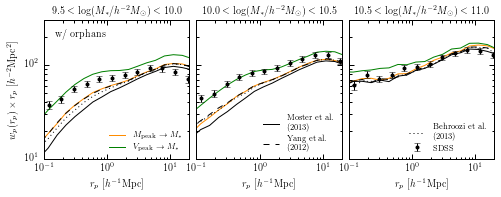

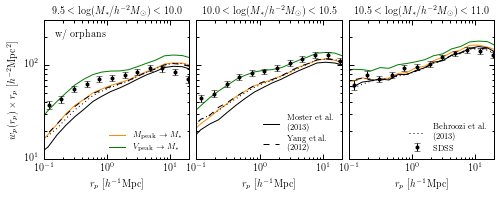

In [20]:
#load SDSS results from Yang 2012
from lss_observations import yang_2012_wp

#create arrays to store results

wp_sdss_1, cov = yang_2012_wp(10.0**9.5,10.0**10.0, sample='Mass-limit')
err_1 = np.sqrt(np.diagonal(cov))

wp_sdss_2, cov = yang_2012_wp(10.0**10.0,10.0**10.5, sample='Mass-limit')
err_2 = np.sqrt(np.diagonal(cov))

wp_sdss_3, cov = yang_2012_wp(10.0**10.5,10.0**11.0, sample='Mass-limit')
err_3 = np.sqrt(np.diagonal(cov))

#plot results
fig, axes = plt.subplots(nrows=1,ncols=3,sharex=True,sharey=True,figsize=(6.95, 2.75))
fig.subplots_adjust(hspace=0, wspace=0.05, left=0.075, right=0.975, bottom=0.2, top=0.9)
    
ax = axes[0]
ax.set_xlim([0.1,20])
ax.set_ylim([10,300])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r'$w_p(r_p) \times r_p ~ [h^{-2}{\rm Mpc}^2]$')
ax.set_xlabel(r'$r_p~[h^{-1}{\rm Mpc}]$')
ax.set_title(r'$9.5<\log(M_{*}/h^{-2}M_{\odot})<10.0$')
    
ax = axes[1]
ax.set_xlim([0.1,20])
ax.set_ylim([10,300])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$r_p~[h^{-1}{\rm Mpc}]$')
ax.set_title(r'$10.0<\log(M_{*}/h^{-2}M_{\odot})<10.5$')
    
ax = axes[2]
ax.set_xlim([0.1,20])
ax.set_ylim([10,300])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$r_p~[h^{-1}{\rm Mpc}]$')
ax.set_title(r'$10.5<\log(M_{*}/h^{-2}M_{\odot})<11.0$')

ax = axes[0]
p1, = ax.plot(rp_bin_centers, wp_1a[0]*rp_bin_centers, '-', color='darkorange', alpha=1)
p2, = ax.plot(rp_bin_centers, wp_2a[0]*rp_bin_centers, '-', color='green', alpha=1)
p3, = ax.plot(rp_bin_centers, wp_3a[0]*rp_bin_centers, '-', color='black', alpha=1)
p4, = ax.plot(rp_bin_centers, wp_4a[0]*rp_bin_centers, '--', color='black', alpha=1)
p5, = ax.plot(rp_bin_centers, wp_5a[0]*rp_bin_centers, ':', color='black', alpha=1)
p0 = ax.errorbar(wp_sdss_1[0,:], wp_sdss_1[1,:]*wp_sdss_1[0,:], yerr=err_1*wp_sdss_1[0,:],
                  fmt='o', color='black', ms=4, mec='none')

ax = axes[1]
p1, = ax.plot(rp_bin_centers, wp_1a[1]*rp_bin_centers, '-', color='darkorange', alpha=1)
p2, = ax.plot(rp_bin_centers, wp_2a[1]*rp_bin_centers, '-', color='green', alpha=1)
p3, = ax.plot(rp_bin_centers, wp_3a[1]*rp_bin_centers, '-', color='black', alpha=1)
p4, = ax.plot(rp_bin_centers, wp_4a[1]*rp_bin_centers, '--', color='black', alpha=1)
p5, = ax.plot(rp_bin_centers, wp_5a[1]*rp_bin_centers, ':', color='black', alpha=1)
p0 = ax.errorbar(wp_sdss_2[0,:], wp_sdss_2[1,:]*wp_sdss_2[0,:], yerr=err_2*wp_sdss_2[0,:],
                  fmt='o', color='black', ms=4, mec='none')

ax = axes[2]
p1, = ax.plot(rp_bin_centers, wp_1a[2]*rp_bin_centers, '-', color='darkorange', alpha=1)
p2, = ax.plot(rp_bin_centers, wp_2a[2]*rp_bin_centers, '-', color='green', alpha=1)
p3, = ax.plot(rp_bin_centers, wp_3a[2]*rp_bin_centers, '-', color='black', alpha=1)
p4, = ax.plot(rp_bin_centers, wp_4a[2]*rp_bin_centers, '--', color='black', alpha=1)
p5, = ax.plot(rp_bin_centers, wp_5a[2]*rp_bin_centers, ':', color='black', alpha=1)
p0 = ax.errorbar(wp_sdss_3[0,:], wp_sdss_3[1,:]*wp_sdss_3[0,:], yerr=err_3*wp_sdss_3[0,:],
                  fmt='o', color='black', ms=4, mec='none')

#add legends
ax = axes[0]
ax.legend((p1,p2),
     (r'$M_{\rm peak} \rightarrow M_*$',r'$V_{\rm peak} \rightarrow M_*$'),
     frameon = False, fontsize=8, loc='lower right', numpoints=1, handletextpad=1)

ax = axes[1]
ax.legend((p3,p4,p5,p0),
    ('Moster et al.\n (2013)','Yang et al.\n (2012)'),
    frameon = False, fontsize=8, loc='lower right', numpoints=1, handletextpad=1)

ax = axes[2]
ax.legend((p5,p0),
    ('Behroozi et al.\n (2013)', 'SDSS'),
    frameon = False, fontsize=8, loc='lower right', numpoints=1, handletextpad=1)

ax = axes[0]
ax.text(0.15,200,'w/ orphans')

plt.show()

filepath = PROJECT_DIRECTORY + 'figures/'
filename = 'wp_comparison_w_orphans_a'
fig.savefig(filepath+filename+'.pdf', dpi=300)

#plot results
fig, axes = plt.subplots(nrows=1,ncols=3,sharex=True,sharey=True,figsize=(6.95, 2.75))
fig.subplots_adjust(hspace=0, wspace=0.05, left=0.075, right=0.975, bottom=0.2, top=0.9)
    
ax = axes[0]
ax.set_xlim([0.1,20])
ax.set_ylim([10,300])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r'$w_p(r_p) \times r_p ~ [h^{-2}{\rm Mpc}^2]$')
ax.set_xlabel(r'$r_p~[h^{-1}{\rm Mpc}]$')
ax.set_title(r'$9.5<\log(M_{*}/h^{-2}M_{\odot})<10.0$')
    
ax = axes[1]
ax.set_xlim([0.1,20])
ax.set_ylim([10,300])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$r_p~[h^{-1}{\rm Mpc}]$')
ax.set_title(r'$10.0<\log(M_{*}/h^{-2}M_{\odot})<10.5$')
    
ax = axes[2]
ax.set_xlim([0.1,20])
ax.set_ylim([10,300])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$r_p~[h^{-1}{\rm Mpc}]$')
ax.set_title(r'$10.5<\log(M_{*}/h^{-2}M_{\odot})<11.0$')

ax = axes[0]
p1, = ax.plot(rp_bin_centers, wp_1b[0]*rp_bin_centers, '-', color='darkorange', alpha=1)
p2, = ax.plot(rp_bin_centers, wp_2b[0]*rp_bin_centers, '-', color='green', alpha=1)
p3, = ax.plot(rp_bin_centers, wp_3b[0]*rp_bin_centers, '-', color='black', alpha=1)
p4, = ax.plot(rp_bin_centers, wp_4b[0]*rp_bin_centers, '--', color='black', alpha=1)
p5, = ax.plot(rp_bin_centers, wp_5b[0]*rp_bin_centers, ':', color='black', alpha=1)
p0 = ax.errorbar(wp_sdss_1[0,:], wp_sdss_1[1,:]*wp_sdss_1[0,:], yerr=err_1*wp_sdss_1[0,:],
                  fmt='o', color='black', ms=4, mec='none')

ax = axes[1]
p1, = ax.plot(rp_bin_centers, wp_1b[1]*rp_bin_centers, '-', color='darkorange', alpha=1)
p2, = ax.plot(rp_bin_centers, wp_2b[1]*rp_bin_centers, '-', color='green', alpha=1)
p3, = ax.plot(rp_bin_centers, wp_3b[1]*rp_bin_centers, '-', color='black', alpha=1)
p4, = ax.plot(rp_bin_centers, wp_4b[1]*rp_bin_centers, '--', color='black', alpha=1)
p5, = ax.plot(rp_bin_centers, wp_5b[1]*rp_bin_centers, ':', color='black', alpha=1)
p0 = ax.errorbar(wp_sdss_2[0,:], wp_sdss_2[1,:]*wp_sdss_2[0,:], yerr=err_2*wp_sdss_2[0,:],
                  fmt='o', color='black', ms=4, mec='none')

ax = axes[2]
p1, = ax.plot(rp_bin_centers, wp_1b[2]*rp_bin_centers, '-', color='darkorange', alpha=1)
p2, = ax.plot(rp_bin_centers, wp_2b[2]*rp_bin_centers, '-', color='green', alpha=1)
p3, = ax.plot(rp_bin_centers, wp_3b[2]*rp_bin_centers, '-', color='black', alpha=1)
p4, = ax.plot(rp_bin_centers, wp_4b[2]*rp_bin_centers, '--', color='black', alpha=1)
p5, = ax.plot(rp_bin_centers, wp_5b[2]*rp_bin_centers, ':', color='black', alpha=1)
p0 = ax.errorbar(wp_sdss_3[0,:], wp_sdss_3[1,:]*wp_sdss_3[0,:], yerr=err_3*wp_sdss_3[0,:],
                  fmt='o', color='black', ms=4, mec='none')

#add legends
ax = axes[0]
ax.legend((p1,p2),
     (r'$M_{\rm peak} \rightarrow M_*$',r'$V_{\rm peak} \rightarrow M_*$'),
     frameon = False, fontsize=8, loc='lower right', numpoints=1, handletextpad=1)

ax = axes[1]
ax.legend((p3,p4,p5,p0),
    ('Moster et al.\n (2013)','Yang et al.\n (2012)'),
    frameon = False, fontsize=8, loc='lower right', numpoints=1, handletextpad=1)

ax = axes[2]
ax.legend((p5,p0),
    ('Behroozi et al.\n (2013)', 'SDSS'),
    frameon = False, fontsize=8, loc='lower right', numpoints=1, handletextpad=1)

ax = axes[0]
ax.text(0.15,200,'w/ orphans')

plt.show()

filepath = PROJECT_DIRECTORY + 'figures/'
filename = 'wp_comparison_w_orphans_b'
fig.savefig(filepath+filename+'.pdf', dpi=300)

##How many orphans are needed to increase clustering enough?

In [21]:
#free some memory
mock_1a = 0
mock_1b = 0
mock_2a = 0
mock_2b = 0
mock_3a = 0
mock_3b = 0
mock_4a = 0
mock_4b = 0
mock_5a = 0
mock_5b = 0

In [22]:
#add oprhans

composite_model_1.param_dict['c_ceil'] = 0.6 #RM
composite_model_2.param_dict['c_ceil'] = 1.0 #RV
composite_model_3.param_dict['c_ceil'] = 0.4 #M13
composite_model_4.param_dict['c_ceil'] = 0.5 #Y12
composite_model_5.param_dict['c_ceil'] = 0.5 #B13

composite_model_1.populate_mock(halocat = halocat_1)
mock_11a = composite_model_1.mock.galaxy_table
composite_model_1.populate_mock(halocat = halocat_2)
mock_11b = composite_model_1.mock.galaxy_table

composite_model_2.populate_mock(halocat = halocat_1)
mock_21a = composite_model_2.mock.galaxy_table
composite_model_2.populate_mock(halocat = halocat_2)
mock_21b = composite_model_2.mock.galaxy_table

composite_model_3.populate_mock(halocat = halocat_1)
mock_31a = composite_model_3.mock.galaxy_table
composite_model_3.populate_mock(halocat = halocat_2)
mock_31b = composite_model_3.mock.galaxy_table

composite_model_4.populate_mock(halocat = halocat_1)
mock_41a = composite_model_4.mock.galaxy_table
composite_model_4.populate_mock(halocat = halocat_2)
mock_41b = composite_model_4.mock.galaxy_table

composite_model_5.populate_mock(halocat = halocat_1)
mock_51a = composite_model_5.mock.galaxy_table
composite_model_5.populate_mock(halocat = halocat_2)
mock_51b = composite_model_5.mock.galaxy_table

In [38]:
def orphan_fraction(mock, only_sats=True, mask=None):
    
    if mask is None:
        mask_2 = np.array([True]*len(mock))
    else:
        mask_2 = mask
        
    mask_1 = (mock['orphan'][mask_2]==1)
    
    if only_sats:
        sats = (mock['halo_upid'][mask_2]!=-1)
        f = np.sum(mask_1)/np.sum(sats)
    else:
        f = np.sum(mask_1)/len(mask_1)
    
    return f

mask = (mock_11a['stellar_mass']>=10**9.5) & (mock_11a['stellar_mass']<10**10.0) 
f_1a = orphan_fraction(mock_11a, only_sats=True, mask=mask)
mask = (mock_11b['stellar_mass']>=10**9.5) & (mock_11b['stellar_mass']<10**10.0) 
f_1b = orphan_fraction(mock_11b, only_sats=True, mask=mask)

mask = (mock_21a['stellar_mass']>=10**9.5) & (mock_21a['stellar_mass']<10**10.0) 
f_2a = orphan_fraction(mock_21a, only_sats=True, mask=mask)
mask = (mock_21b['stellar_mass']>=10**9.5) & (mock_21b['stellar_mass']<10**10.0) 
f_2b = orphan_fraction(mock_21b, only_sats=True, mask=mask)

mask = (mock_31a['stellar_mass']>=10**9.5) & (mock_31a['stellar_mass']<10**10.0) 
f_3a = orphan_fraction(mock_31a, only_sats=True, mask=mask)
mask = (mock_31b['stellar_mass']>=10**9.5) & (mock_31b['stellar_mass']<10**10.0) 
f_3b = orphan_fraction(mock_31b, only_sats=True, mask=mask)

mask = (mock_41a['stellar_mass']>=10**9.5) & (mock_41a['stellar_mass']<10**10.0) 
f_4a = orphan_fraction(mock_41a, only_sats=True, mask=mask)
mask = (mock_41b['stellar_mass']>=10**9.5) & (mock_41b['stellar_mass']<10**10.0) 
f_4b = orphan_fraction(mock_41b, only_sats=True, mask=mask)

mask = (mock_51a['stellar_mass']>=10**9.5) & (mock_51a['stellar_mass']<10**10.0) 
f_5a = orphan_fraction(mock_51a, only_sats=True, mask=mask)
mask = (mock_51b['stellar_mass']>=10**9.5) & (mock_51b['stellar_mass']<10**10.0) 
f_5b = orphan_fraction(mock_51b, only_sats=True, mask=mask)

print("precent of satellite galaxies that are orphans:")
print("model 1a: ", f_1a*100)
print("model 1b: ", f_1b*100)
print("model 2a: ", f_2a*100)
print("model 2b: ", f_2b*100)
print("model 3a: ", f_3a*100)
print("model 3b: ", f_3b*100)
print("model 4a: ", f_4a*100)
print("model 4b: ", f_4b*100)
print("model 5a: ", f_5a*100)
print("model 5b: ", f_5b*100)

f_1a = orphan_fraction(mock_11a, only_sats=False)
f_1b = orphan_fraction(mock_11b, only_sats=False)
f_2a = orphan_fraction(mock_21a, only_sats=False)
f_2b = orphan_fraction(mock_21b, only_sats=False)
f_3a = orphan_fraction(mock_31a, only_sats=False)
f_3b = orphan_fraction(mock_31b, only_sats=False)
f_4a = orphan_fraction(mock_41a, only_sats=False)
f_4b = orphan_fraction(mock_41b, only_sats=False)
f_5a = orphan_fraction(mock_51a, only_sats=False)
f_5b = orphan_fraction(mock_51b, only_sats=False)

print("precent of all galaxies that are orphans:")
print("model 1a: ", f_1a*100)
print("model 1b: ", f_1b*100)
print("model 2a: ", f_2a*100)
print("model 2b: ", f_2b*100)
print("model 3a: ", f_3a*100)
print("model 3b: ", f_3b*100)
print("model 4a: ", f_4a*100)
print("model 4b: ", f_4b*100)
print("model 5a: ", f_5a*100)
print("model 5b: ", f_5b*100)

precent of satellite galaxies that are orphans:
model 1a:  40.4795380837
model 1b:  40.6277672061
model 2a:  2.01095010703
model 2b:  2.12875465794
model 3a:  60.498473444
model 3b:  60.2783192058
model 4a:  50.6908983524
model 4b:  50.6319971109
model 5a:  50.7522352899
model 5b:  50.4961647803
precent of all galaxies that are orphans:
model 1a:  12.5314742753
model 1b:  12.5528985361
model 2a:  0.381895142025
model 2b:  0.40597449026
model 3a:  20.2907413988
model 3b:  20.22944498
model 4a:  18.0822665235
model 4b:  18.0321213359
model 5a:  16.5569435696
model 5b:  16.5709372533


In [23]:
#define rp bins
rp_bins = np.logspace(-2.0,1.4,25)
rp_bin_centers = (rp_bins[:-1]+rp_bins[1:])/2.0

#create arrays to store results for each mock
wp_12a = np.zeros((3,24))
wp_22a = np.zeros((3,24))
wp_32a = np.zeros((3,24))
wp_42a = np.zeros((3,24))
wp_52a = np.zeros((3,24))

wp_12b = np.zeros((3,24))
wp_22b = np.zeros((3,24))
wp_32b = np.zeros((3,24))
wp_42b = np.zeros((3,24))
wp_52b = np.zeros((3,24))

In [24]:
wp_12a[0] = calculate_wp(mock_11a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=9.5, log_mstar_max =10.0)
wp_22a[0] = calculate_wp(mock_21a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=9.5, log_mstar_max =10.0)
wp_32a[0] = calculate_wp(mock_31a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=9.5, log_mstar_max =10.0)
wp_42a[0] = calculate_wp(mock_41a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=9.5, log_mstar_max =10.0)
wp_52a[0] = calculate_wp(mock_51a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=9.5, log_mstar_max =10.0)

wp_12b[0] = calculate_wp(mock_11b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=9.5, log_mstar_max =10.0)
wp_22b[0] = calculate_wp(mock_21b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=9.5, log_mstar_max =10.0)
wp_32b[0] = calculate_wp(mock_31b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=9.5, log_mstar_max =10.0)
wp_42b[0] = calculate_wp(mock_41b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=9.5, log_mstar_max =10.0)
wp_52b[0] = calculate_wp(mock_51b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=9.5, log_mstar_max =10.0)

In [25]:
wp_12a[1] = calculate_wp(mock_11a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=10.0, log_mstar_max =10.5)
wp_22a[1] = calculate_wp(mock_21a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=10.0, log_mstar_max =10.5)
wp_32a[1] = calculate_wp(mock_31a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=10.0, log_mstar_max =10.5)
wp_42a[1] = calculate_wp(mock_41a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=10.0, log_mstar_max =10.5)
wp_52a[1] = calculate_wp(mock_51a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=10.0, log_mstar_max =10.5)

wp_12b[1] = calculate_wp(mock_11b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=10.0, log_mstar_max =10.5)
wp_22b[1] = calculate_wp(mock_21b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=10.0, log_mstar_max =10.5)
wp_32b[1] = calculate_wp(mock_31b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=10.0, log_mstar_max =10.5)
wp_42b[1] = calculate_wp(mock_41b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=10.0, log_mstar_max =10.5)
wp_52b[1] = calculate_wp(mock_51b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=10.0, log_mstar_max =10.5)

In [26]:
wp_12a[2] = calculate_wp(mock_11a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=10.5, log_mstar_max =11.0)
wp_22a[2] = calculate_wp(mock_21a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=10.5, log_mstar_max =11.0)
wp_32a[2] = calculate_wp(mock_31a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=10.5, log_mstar_max =11.0)
wp_42a[2] = calculate_wp(mock_41a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=10.5, log_mstar_max =11.0)
wp_52a[2] = calculate_wp(mock_51a, rp_bins, pi_max=40.0, Lbox=halocat_1.Lbox,
                    log_mstar_min=10.5, log_mstar_max =11.0)

wp_12b[2] = calculate_wp(mock_11b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=10.5, log_mstar_max =11.0)
wp_22b[2] = calculate_wp(mock_21b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=10.5, log_mstar_max =11.0)
wp_32b[2] = calculate_wp(mock_31b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=10.5, log_mstar_max =11.0)
wp_42b[2] = calculate_wp(mock_41b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=10.5, log_mstar_max =11.0)
wp_52b[2] = calculate_wp(mock_51b, rp_bins, pi_max=40.0, Lbox=halocat_2.Lbox,
                    log_mstar_min=10.5, log_mstar_max =11.0)

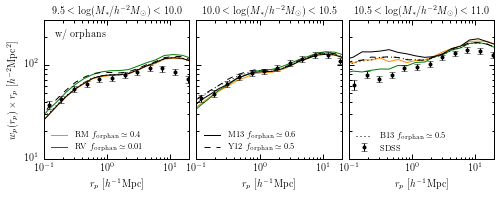

In [63]:
#load SDSS results from Yang 2012
from lss_observations import yang_2012_wp

#create arrays to store results

wp_sdss_1, cov = yang_2012_wp(10.0**9.5,10.0**10.0, sample='Mass-limit')
err_1 = np.sqrt(np.diagonal(cov))

wp_sdss_2, cov = yang_2012_wp(10.0**10.0,10.0**10.5, sample='Mass-limit')
err_2 = np.sqrt(np.diagonal(cov))

wp_sdss_3, cov = yang_2012_wp(10.0**10.5,10.0**11.0, sample='Mass-limit')
err_3 = np.sqrt(np.diagonal(cov))

#plot results

fig, axes = plt.subplots(nrows=1,ncols=3,sharex=True,sharey=True,figsize=(6.95, 2.75))
fig.subplots_adjust(hspace=0, wspace=0.05, left=0.075, right=0.975, bottom=0.2, top=0.9)
    
ax = axes[0]
ax.set_xlim([0.1,20])
ax.set_ylim([10,300])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r'$w_p(r_p) \times r_p ~ [h^{-2}{\rm Mpc}^2]$')
ax.set_xlabel(r'$r_p~[h^{-1}{\rm Mpc}]$')
ax.set_title(r'$9.5<\log(M_{*}/h^{-2}M_{\odot})<10.0$')
    
ax = axes[1]
ax.set_xlim([0.1,20])
ax.set_ylim([10,300])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$r_p~[h^{-1}{\rm Mpc}]$')
ax.set_title(r'$10.0<\log(M_{*}/h^{-2}M_{\odot})<10.5$')
    
ax = axes[2]
ax.set_xlim([0.1,20])
ax.set_ylim([10,300])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$r_p~[h^{-1}{\rm Mpc}]$')
ax.set_title(r'$10.5<\log(M_{*}/h^{-2}M_{\odot})<11.0$')

ax = axes[0]
p1, = ax.plot(rp_bin_centers, wp_12a[0]*rp_bin_centers, '-', color='darkorange', alpha=1)
p2, = ax.plot(rp_bin_centers, wp_22a[0]*rp_bin_centers, '-', color='green', alpha=1)
p3, = ax.plot(rp_bin_centers, wp_32a[0]*rp_bin_centers, '-', color='black', alpha=1)
p4, = ax.plot(rp_bin_centers, wp_42a[0]*rp_bin_centers, '--', color='black', alpha=1)
p5, = ax.plot(rp_bin_centers, wp_52a[0]*rp_bin_centers, ':', color='black', alpha=1)
p0 = ax.errorbar(wp_sdss_1[0,:], wp_sdss_1[1,:]*wp_sdss_1[0,:], yerr=err_1*wp_sdss_1[0,:],
                  fmt='o', color='black', ms=4, mec='none')

ax = axes[1]
p1, = ax.plot(rp_bin_centers, wp_12a[1]*rp_bin_centers, '-', color='darkorange', alpha=1)
p2, = ax.plot(rp_bin_centers, wp_22a[1]*rp_bin_centers, '-', color='green', alpha=1)
p3, = ax.plot(rp_bin_centers, wp_32a[1]*rp_bin_centers, '-', color='black', alpha=1)
p4, = ax.plot(rp_bin_centers, wp_42a[1]*rp_bin_centers, '--', color='black', alpha=1)
p5, = ax.plot(rp_bin_centers, wp_52a[1]*rp_bin_centers, ':', color='black', alpha=1)
p0 = ax.errorbar(wp_sdss_2[0,:], wp_sdss_2[1,:]*wp_sdss_2[0,:], yerr=err_2*wp_sdss_2[0,:],
                  fmt='o', color='black', ms=4, mec='none')

ax = axes[2]
p1, = ax.plot(rp_bin_centers, wp_12a[2]*rp_bin_centers, '-', color='darkorange', alpha=1)
p2, = ax.plot(rp_bin_centers, wp_22a[2]*rp_bin_centers, '-', color='green', alpha=1)
p3, = ax.plot(rp_bin_centers, wp_32a[2]*rp_bin_centers, '-', color='black', alpha=1)
p4, = ax.plot(rp_bin_centers, wp_42a[2]*rp_bin_centers, '--', color='black', alpha=1)
p5, = ax.plot(rp_bin_centers, wp_52a[2]*rp_bin_centers, ':', color='black', alpha=1)
p0 = ax.errorbar(wp_sdss_3[0,:], wp_sdss_3[1,:]*wp_sdss_3[0,:], yerr=err_3*wp_sdss_3[0,:],
                  fmt='o', color='black', ms=4, mec='none')

#add legends
ax = axes[0]
ax.legend((p1,p2),
     (r'${\rm RM}~f_{\rm orphan}\simeq 0.4$',r'${\rm RV}~f_{\rm orphan}\simeq 0.01$'),
     frameon = False, fontsize=8, loc='lower left', numpoints=1, handletextpad=1)
ax = axes[1]
ax.legend((p3,p4,p5,p0),
    (r'${\rm M13}~f_{\rm orphan}\simeq 0.6$',r'${\rm Y12}~f_{\rm orphan}\simeq 0.5$'),
    frameon = False, fontsize=8, loc='lower left', numpoints=1, handletextpad=1)
ax = axes[2]
ax.legend((p5,p0),
    (r'${\rm B13}~f_{\rm orphan}\simeq 0.5$', 'SDSS'),
    frameon = False, fontsize=8, loc='lower left', numpoints=1, handletextpad=1)
ax = axes[0]
ax.text(0.15,200,'w/ orphans')

plt.show()

filepath = PROJECT_DIRECTORY + 'figures/'
filename = 'wp_comparison_w_orphans_c'
fig.savefig(filepath+filename+'.pdf', dpi=300)

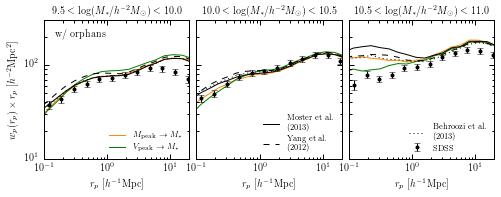

In [28]:
#plot results

fig, axes = plt.subplots(nrows=1,ncols=3,sharex=True,sharey=True,figsize=(6.95, 2.75))
fig.subplots_adjust(hspace=0, wspace=0.05, left=0.075, right=0.975, bottom=0.2, top=0.9)
    
ax = axes[0]
ax.set_xlim([0.1,20])
ax.set_ylim([10,300])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r'$w_p(r_p) \times r_p ~ [h^{-2}{\rm Mpc}^2]$')
ax.set_xlabel(r'$r_p~[h^{-1}{\rm Mpc}]$')
ax.set_title(r'$9.5<\log(M_{*}/h^{-2}M_{\odot})<10.0$')
    
ax = axes[1]
ax.set_xlim([0.1,20])
ax.set_ylim([10,300])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$r_p~[h^{-1}{\rm Mpc}]$')
ax.set_title(r'$10.0<\log(M_{*}/h^{-2}M_{\odot})<10.5$')
    
ax = axes[2]
ax.set_xlim([0.1,20])
ax.set_ylim([10,300])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$r_p~[h^{-1}{\rm Mpc}]$')
ax.set_title(r'$10.5<\log(M_{*}/h^{-2}M_{\odot})<11.0$')

ax = axes[0]
p1, = ax.plot(rp_bin_centers, wp_12b[0]*rp_bin_centers, '-', color='darkorange', alpha=1)
p2, = ax.plot(rp_bin_centers, wp_22b[0]*rp_bin_centers, '-', color='green', alpha=1)
p3, = ax.plot(rp_bin_centers, wp_32b[0]*rp_bin_centers, '-', color='black', alpha=1)
p4, = ax.plot(rp_bin_centers, wp_42b[0]*rp_bin_centers, '--', color='black', alpha=1)
p5, = ax.plot(rp_bin_centers, wp_52b[0]*rp_bin_centers, ':', color='black', alpha=1)
p0 = ax.errorbar(wp_sdss_1[0,:], wp_sdss_1[1,:]*wp_sdss_1[0,:], yerr=err_1*wp_sdss_1[0,:],
                  fmt='o', color='black', ms=4, mec='none')

ax = axes[1]
p1, = ax.plot(rp_bin_centers, wp_12b[1]*rp_bin_centers, '-', color='darkorange', alpha=1)
p2, = ax.plot(rp_bin_centers, wp_22b[1]*rp_bin_centers, '-', color='green', alpha=1)
p3, = ax.plot(rp_bin_centers, wp_32b[1]*rp_bin_centers, '-', color='black', alpha=1)
p4, = ax.plot(rp_bin_centers, wp_42b[1]*rp_bin_centers, '--', color='black', alpha=1)
p5, = ax.plot(rp_bin_centers, wp_52b[1]*rp_bin_centers, ':', color='black', alpha=1)
p0 = ax.errorbar(wp_sdss_2[0,:], wp_sdss_2[1,:]*wp_sdss_2[0,:], yerr=err_2*wp_sdss_2[0,:],
                  fmt='o', color='black', ms=4, mec='none')

ax = axes[2]
p1, = ax.plot(rp_bin_centers, wp_12b[2]*rp_bin_centers, '-', color='darkorange', alpha=1)
p2, = ax.plot(rp_bin_centers, wp_22b[2]*rp_bin_centers, '-', color='green', alpha=1)
p3, = ax.plot(rp_bin_centers, wp_32b[2]*rp_bin_centers, '-', color='black', alpha=1)
p4, = ax.plot(rp_bin_centers, wp_42b[2]*rp_bin_centers, '--', color='black', alpha=1)
p5, = ax.plot(rp_bin_centers, wp_52b[2]*rp_bin_centers, ':', color='black', alpha=1)
p0 = ax.errorbar(wp_sdss_3[0,:], wp_sdss_3[1,:]*wp_sdss_3[0,:], yerr=err_3*wp_sdss_3[0,:],
                  fmt='o', color='black', ms=4, mec='none')

#add legends
ax = axes[0]
ax.legend((p1,p2),
     (r'$M_{\rm peak} \rightarrow M_*$',r'$V_{\rm peak} \rightarrow M_*$'),
     frameon = False, fontsize=8, loc='lower right', numpoints=1, handletextpad=1)

ax = axes[1]
ax.legend((p3,p4,p5,p0),
    ('Moster et al.\n (2013)','Yang et al.\n (2012)'),
    frameon = False, fontsize=8, loc='lower right', numpoints=1, handletextpad=1)

ax = axes[2]
ax.legend((p5,p0),
    ('Behroozi et al.\n (2013)', 'SDSS'),
    frameon = False, fontsize=8, loc='lower right', numpoints=1, handletextpad=1)

ax = axes[0]
ax.text(0.15,200,'w/ orphans')

plt.show()

filepath = PROJECT_DIRECTORY + 'figures/'
filename = 'wp_comparison_w_orphans_d'
fig.savefig(filepath+filename+'.pdf', dpi=300)

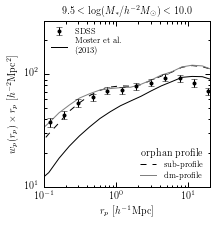

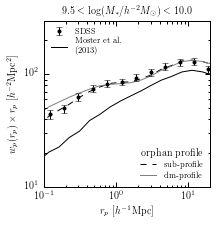

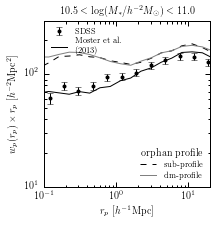

In [49]:
"""
compare effect of sub-halo profiles in single panel
"""

fig, ax = plt.subplots(nrows=1,ncols=1,sharex=True,sharey=True,figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
ax.set_xlim([0.1,20])
ax.set_ylim([10,300])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r'$w_p(r_p) \times r_p ~ [h^{-2}{\rm Mpc}^2]$')
ax.set_xlabel(r'$r_p~[h^{-1}{\rm Mpc}]$')
ax.set_title(r'$9.5<\log(M_{*}/h^{-2}M_{\odot})<10.0$')
p3, = ax.plot(rp_bin_centers, wp_3a[0]*rp_bin_centers, '-', color='black', alpha=1)
p3a, = ax.plot(rp_bin_centers, wp_32a[0]*rp_bin_centers, '--', color='black', alpha=1)
p3b, = ax.plot(rp_bin_centers, wp_32b[0]*rp_bin_centers, '-', color='grey', alpha=1.0)
upper_legend = plt.legend([p0,p3], [r'$\rm SDSS$','Moster et al.\n (2013)'], frameon = False, fontsize=8, loc='upper left', numpoints=1, handletextpad=1)
ax.legend((p3a,p3b),('sub-profile','dm-profile'), title = 'orphan profile',
          frameon = False, fontsize=8, loc='lower right', numpoints=1, handletextpad=1)
p0 = ax.errorbar(wp_sdss_1[0,:], wp_sdss_1[1,:]*wp_sdss_1[0,:], yerr=err_1*wp_sdss_1[0,:],
                  fmt='o', color='black', ms=4, mec='none')
plt.gca().add_artist(upper_legend)
plt.show()

filepath = PROJECT_DIRECTORY + 'figures/'
filename = 'wp_comparison_clone_profile_1'
fig.savefig(filepath+filename+'.pdf', dpi=300)

fig, ax = plt.subplots(nrows=1,ncols=1,sharex=True,sharey=True,figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
ax.set_xlim([0.1,20])
ax.set_ylim([10,300])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r'$w_p(r_p) \times r_p ~ [h^{-2}{\rm Mpc}^2]$')
ax.set_xlabel(r'$r_p~[h^{-1}{\rm Mpc}]$')
ax.set_title(r'$10.0<\log(M_{*}/h^{-2}M_{\odot})<10.5$')
p3, = ax.plot(rp_bin_centers, wp_3a[1]*rp_bin_centers, '-', color='black', alpha=1)
p3a, = ax.plot(rp_bin_centers, wp_32a[1]*rp_bin_centers, '--', color='black', alpha=1)
p3b, = ax.plot(rp_bin_centers, wp_32b[1]*rp_bin_centers, '-', color='grey', alpha=1.0)
upper_legend = plt.legend([p0,p3], [r'$\rm SDSS$','Moster et al.\n (2013)'], frameon = False, fontsize=8, loc='upper left', numpoints=1, handletextpad=1)
ax.legend((p3a,p3b),('sub-profile','dm-profile'), title = 'orphan profile',
          frameon = False, fontsize=8, loc='lower right', numpoints=1, handletextpad=1)
p0 = ax.errorbar(wp_sdss_2[0,:], wp_sdss_2[1,:]*wp_sdss_2[0,:], yerr=err_2*wp_sdss_2[0,:],
                  fmt='o', color='black', ms=4, mec='none')
plt.gca().add_artist(upper_legend)
plt.show()

filepath = PROJECT_DIRECTORY + 'figures/'
filename = 'wp_comparison_clone_profile_2'
fig.savefig(filepath+filename+'.pdf', dpi=300)


fig, ax = plt.subplots(nrows=1,ncols=1,sharex=True,sharey=True,figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
ax.set_xlim([0.1,20])
ax.set_ylim([10,300])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r'$w_p(r_p) \times r_p ~ [h^{-2}{\rm Mpc}^2]$')
ax.set_xlabel(r'$r_p~[h^{-1}{\rm Mpc}]$')
ax.set_title(r'$10.5<\log(M_{*}/h^{-2}M_{\odot})<11.0$')
p3, = ax.plot(rp_bin_centers, wp_3a[2]*rp_bin_centers, '-', color='black', alpha=1)
p3a, = ax.plot(rp_bin_centers, wp_32a[2]*rp_bin_centers, '--', color='black', alpha=1)
p3b, = ax.plot(rp_bin_centers, wp_32b[2]*rp_bin_centers, '-', color='grey', alpha=1.0)
upper_legend = plt.legend([p0,p3], [r'$\rm SDSS$','Moster et al.\n (2013)'], frameon = False, fontsize=8, loc='upper left', numpoints=1, handletextpad=1)
ax.legend((p3a,p3b),('sub-profile','dm-profile'), title = 'orphan profile',
          frameon = False, fontsize=8, loc='lower right', numpoints=1, handletextpad=1)
p0 = ax.errorbar(wp_sdss_3[0,:], wp_sdss_3[1,:]*wp_sdss_3[0,:], yerr=err_3*wp_sdss_3[0,:],
                  fmt='o', color='black', ms=4, mec='none')
plt.gca().add_artist(upper_legend)
plt.show()

filepath = PROJECT_DIRECTORY + 'figures/'
filename = 'wp_comparison_clone_profile_3'
fig.savefig(filepath+filename+'.pdf', dpi=300)


###What does the stellar mass function look like now?

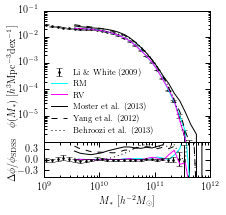

In [82]:
def stellar_mass_func(mock):
    """
    caclulate stellar mass function
    """
    
    #stellar mass function
    bins = np.arange(9.5,12,0.1)
    bins = 10.0**bins
    bin_centers = (bins[:-1]+bins[1:])/2.0
    counts = np.histogram(mock['stellar_mass'],bins=bins)[0]
    dndm = counts/(halocat.Lbox**3)/0.1

    return dndm, bin_centers

dndm_1, bin_centers = stellar_mass_func(mock_11)
dndm_2, bin_centers = stellar_mass_func(mock_21)
dndm_3, bin_centers = stellar_mass_func(mock_31)
dndm_4, bin_centers = stellar_mass_func(mock_41)
dndm_5, bin_centers = stellar_mass_func(mock_51)

#load sdss results
from lss_observations.stellar_mass_functions import LiWhite_2009_phi
from lss_observations.stellar_mass_functions import Baldry_2011_phi
from lss_observations.stellar_mass_functions import Yang_2012_phi
sdss_phi = LiWhite_2009_phi()
#sdss_phi = Baldry_2011_phi()
#sdss_phi = Yang_2012_phi()

sdss_m = np.arange(9,12,0.1)
sdss_m = 10.0**sdss_m 
sdss_dndm = sdss_phi(sdss_m)
sdss_err = sdss_dndm * 0.05

sdss_dndm = sdss_phi.data_table['phi']
sdss_err = sdss_phi.data_table['err']
sdss_m = sdss_phi.data_table['bin_center']

#plot stellar mass function
fig = plt.figure(figsize=(3.3,3.3))

#upper panel
rect = 0.2,0.35,0.7,0.55
ax = fig.add_axes(rect)
p0 = ax.errorbar(sdss_m, sdss_dndm, yerr=sdss_err, fmt='o', color='black', ms=2)
p1, = ax.plot(bin_centers, dndm_1, '-', color='cyan')
p2, = ax.plot(bin_centers, dndm_2, '-', color='magenta')
p3, = ax.plot(bin_centers, dndm_3, '-', color='black')
p4, = ax.plot(bin_centers, dndm_4, '--', color='black')
p5, = ax.plot(bin_centers, dndm_5, ':', color='black')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r'$\phi(M_{*})~[h^{3}{\rm Mpc}^{-3}{\rm dex}^{-1}]$', labelpad=-1)
ax.set_xlim([10**9,10**12])
ax.set_ylim([10**-6,10**-1])
ax.set_yticks([10**-5,10**-4,10**-3,10**-2,10**-1])
ax.xaxis.set_visible(False)
plt.legend((p0,p1,p2,p3,p4,p5),
           ("Li \& White (2009)","RM","RV","Moster et al. (2013)",\
            "Yang et al. (2012)","Behroozi et al. (2013)"),\
           loc=3, fontsize=8, frameon=False, numpoints=1)

#lower panel
rect = 0.2,0.2,0.7,0.15
ax = fig.add_axes(rect)
ax.plot(bin_centers, (dndm_1-sdss_phi(bin_centers))/sdss_phi(bin_centers),'-', color='cyan')
ax.plot(bin_centers, (dndm_2-sdss_phi(bin_centers))/sdss_phi(bin_centers),'-', color='magenta')
ax.plot(bin_centers, (dndm_3-sdss_phi(bin_centers))/sdss_phi(bin_centers),'-', color='black')
ax.plot(bin_centers, (dndm_4-sdss_phi(bin_centers))/sdss_phi(bin_centers),'--', color='black')
ax.plot(bin_centers, (dndm_5-sdss_phi(bin_centers))/sdss_phi(bin_centers),':', color='black')
ax.errorbar(sdss_m,  (sdss_dndm-sdss_phi(sdss_m))/sdss_phi(sdss_m), yerr=(sdss_err)/sdss_phi(sdss_m), fmt='o', color='black', ms=2)
ax.set_ylabel(r'$\Delta\phi/\phi_{\rm SDSS}$', labelpad=-2)
ax.set_xlabel(r'$M_{*} ~[h^{-2}M_{\odot}]$')
ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_ylim([10**(-0.2),10**(0.2)])
ax.set_ylim([-0.5,0.5])
ax.set_yticks([-0.3,0.0,0.3])
ax.set_xlim([10**9,10**12])

plt.show()

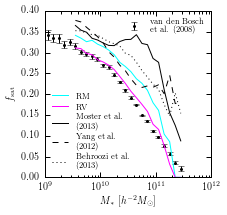

In [88]:
#examine the satellite fraction as a function of stellar mass

def f_sat_mstar_dep(mock):
    """
    satellite fraction as a function of stellar mass
    """

    cens = (mock['halo_upid']==-1)
    sats = (mock['halo_upid']!=-1)

    bins = np.arange(9.5,11.6,0.1)
    bins = 10.0**bins
    bin_centers = (bins[:-1]+bins[1:])/2.0

    n_sat = np.histogram(mock['stellar_mass'][sats],bins=bins)[0]
    n = np.histogram(mock['stellar_mass'],bins=bins)[0]
    f_sat = 1.0*n_sat/n
    
    return f_sat, bin_centers

f_sat_11, bin_centers = f_sat_mstar_dep(mock_11)
f_sat_22, bin_centers = f_sat_mstar_dep(mock_21)
f_sat_33, bin_centers = f_sat_mstar_dep(mock_31)
f_sat_44, bin_centers = f_sat_mstar_dep(mock_41)
f_sat_55, bin_centers = f_sat_mstar_dep(mock_51)

f_sat_1 = float(np.sum(mock_11['halo_upid']!=-1))/len(mock_11)
f_sat_2 = float(np.sum(mock_21['halo_upid']!=-1))/len(mock_21)
f_sat_3 = float(np.sum(mock_31['halo_upid']!=-1))/len(mock_31)
f_sat_4 = float(np.sum(mock_41['halo_upid']!=-1))/len(mock_41)
f_sat_5 = float(np.sum(mock_51['halo_upid']!=-1))/len(mock_51)

f_sat_sdss = np.array([31.4,33.0,34.2,33.5,33.4,31.9,32.5,31.5,30.1,\
              29.7,29.1,28.5,26.9,26.5,24.7,22.9,20.9,19.2,\
             17.5,14.9,13.6,11.1,9.7,7.6,5.7,3.5,2.1])/100.0
f_sat_sdss_err = np.array([1.1,1.3,1.2,1.0,1.1,0.8,0.7,0.7,0.5,0.5,0.6,\
                  0.4,0.4,0.4,0.3,0.2,0.3,0.3,0.2,0.2,0.2,0.3,\
                  0.3,0.3,0.3,0.4,0.6])/100.0
m_sdss = 10**np.arange(8.85,11.46,0.1)

    
fig = plt.figure(figsize=(3.3,3.3))
ax = fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
p0 = plt.errorbar(m_sdss,f_sat_sdss,yerr=f_sat_sdss_err,
                  fmt='o', color='black', ms=3, mec='none')
p1, = plt.plot(bin_centers, f_sat_11, '-', color='cyan')
#plt.plot([2*10**9],[f_sat_1],'o',color='cyan', mec='none', ms=5)
p2, = plt.plot(bin_centers, f_sat_22, '-', color='magenta')
#plt.plot([2*10**9],[f_sat_2],'o',color='magenta', mec='none', ms=5)
p3, = plt.plot(bin_centers, f_sat_33, '-', color='black')
#plt.plot([2*10**9],[f_sat_3],'x',color='black', ms=5)
p4, = plt.plot(bin_centers, f_sat_44, '--', color='black')
#plt.plot([2*10**9],[f_sat_4],'s',color='black', mec='none', ms=5)
p5, = plt.plot(bin_centers, f_sat_55, ':',  color='black')
#plt.plot([2*10**9],[f_sat_5],'p',color='black', mec='none', ms=5)
plt.xscale('log')
plt.xlim([10**9.0,10.0**12.0])
plt.ylim([0,0.4])
plt.xlabel(r'$M_{*}~[h^{-2}M_{\odot}]$')
plt.ylabel(r'$f_{\rm sat}$')

#add legends
first_legend = plt.legend((p1,p2,p3,p4,p5),
     ('RM','RV','Moster et al.\n (2013)','Yang et al.\n (2012)','Behroozi et al.\n (2013)'),
     frameon = False, fontsize=8, loc='lower left',
     numpoints=1, handletextpad=1)
ax = plt.gca().add_artist(first_legend)
plt.legend([p0],
     ['van den Bosch\n et al. (2008)'],
     frameon = False, fontsize=8, loc='upper right',
     numpoints=1, handletextpad=1)

plt.show()

###What fraction of galaxies are orphans?  

In [14]:
f_orphan_1 = 1.0*np.sum(mock_11['orphan'])/len(mock_11)
f_orphan_2 = 1.0*np.sum(mock_21['orphan'])/len(mock_21)
f_orphan_3 = 1.0*np.sum(mock_31['orphan'])/len(mock_31)
f_orphan_4 = 1.0*np.sum(mock_41['orphan'])/len(mock_41)
f_orphan_5 = 1.0*np.sum(mock_51['orphan'])/len(mock_51)

print(f_orphan_1,f_orphan_2,f_orphan_3,f_orphan_4,f_orphan_5)

0.123415794449 0.00212770963654 0.201753732681 0.16306656654 0.165025867778


##Modify models to fit high-end clustering

In [66]:
print(composite_model_3.param_dict)
composite_model_3.param_dict['scatter_model_param1'] =  0.18
composite_model_3.param_dict['m10'] = 11.590
composite_model_3.param_dict['m11'] = 1.195
composite_model_3.param_dict['n10'] = 0.0351
composite_model_3.param_dict['n11'] = -0.0247
composite_model_3.param_dict['beta10'] = 1.376
composite_model_3.param_dict['beta11'] = -0.826
composite_model_3.param_dict['gamma10'] = 0.608
composite_model_3.param_dict['gamma11'] = 0.329

{'n10': 0.0351, 'n11': -0.0247, 'c_gamma': 1.5, 'beta10': 1.376, 'm11': 1.195, 'm10': 11.59, 'c_floor': 0.1, 'beta11': -0.826, 'gamma11': 0.329, 'gamma10': 0.608, 'c_m0': 10.0, 'c_ceil': 0.4, 'scatter_model_param1': 0.18}


In [ ]:
print(composite_model_5.param_dict)

In [73]:
composite_model_3.param_dict['c_ceil'] = 0.4 #M13
composite_model_4.param_dict['c_ceil'] = 0.5 #Y12
composite_model_5.param_dict['c_ceil'] = 0.5 #B13

#composite_model_3.populate_mock(halocat = halocat)
#mock_32 = composite_model_3.mock.galaxy_table
#mock_32['stellar_mass'] = mock_32['stellar_mass']*0.5

#composite_model_4.populate_mock(halocat = halocat)
#mock_42 = composite_model_4.mock.galaxy_table

composite_model_5.populate_mock(halocat = halocat)
mock_52 = composite_model_5.mock.galaxy_table
mock_52['stellar_mass'] = mock_52['stellar_mass']*0.8

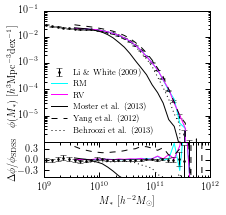

In [74]:
def stellar_mass_func(mock):
    """
    caclulate stellar mass function
    """
    
    #stellar mass function
    bins = np.arange(9.5,12,0.1)
    bins = 10.0**bins
    bin_centers = (bins[:-1]+bins[1:])/2.0
    counts = np.histogram(mock['stellar_mass'],bins=bins)[0]
    dndm = counts/(halocat.Lbox**3)/0.1

    return dndm, bin_centers

dndm_1, bin_centers = stellar_mass_func(mock_11)
dndm_2, bin_centers = stellar_mass_func(mock_21)
dndm_3, bin_centers = stellar_mass_func(mock_32)
dndm_4, bin_centers = stellar_mass_func(mock_42)
dndm_5, bin_centers = stellar_mass_func(mock_52)

#load sdss results
from lss_observations.stellar_mass_functions import LiWhite_2009_phi
from lss_observations.stellar_mass_functions import Baldry_2011_phi
from lss_observations.stellar_mass_functions import Yang_2012_phi
sdss_phi = LiWhite_2009_phi()
#sdss_phi = Baldry_2011_phi()
#sdss_phi = Yang_2012_phi()

sdss_m = np.arange(9,12,0.1)
sdss_m = 10.0**sdss_m 
sdss_dndm = sdss_phi(sdss_m)
sdss_err = sdss_dndm * 0.05

sdss_dndm = sdss_phi.data_table['phi']
sdss_err = sdss_phi.data_table['err']
sdss_m = sdss_phi.data_table['bin_center']

#plot stellar mass function
fig = plt.figure(figsize=(3.3,3.3))

#upper panel
rect = 0.2,0.35,0.7,0.55
ax = fig.add_axes(rect)
p0 = ax.errorbar(sdss_m, sdss_dndm, yerr=sdss_err, fmt='o', color='black', ms=2)
p1, = ax.plot(bin_centers, dndm_1, '-', color='cyan')
p2, = ax.plot(bin_centers, dndm_2, '-', color='magenta')
p3, = ax.plot(bin_centers, dndm_3, '-', color='black')
p4, = ax.plot(bin_centers, dndm_4, '--', color='black')
p5, = ax.plot(bin_centers, dndm_5, ':', color='black')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r'$\phi(M_{*})~[h^{3}{\rm Mpc}^{-3}{\rm dex}^{-1}]$', labelpad=-1)
ax.set_xlim([10**9,10**12])
ax.set_ylim([10**-6,10**-1])
ax.set_yticks([10**-5,10**-4,10**-3,10**-2,10**-1])
ax.xaxis.set_visible(False)
plt.legend((p0,p1,p2,p3,p4,p5),
           ("Li \& White (2009)","RM","RV","Moster et al. (2013)",\
            "Yang et al. (2012)","Behroozi et al. (2013)"),\
           loc=3, fontsize=8, frameon=False, numpoints=1)

#lower panel
rect = 0.2,0.2,0.7,0.15
ax = fig.add_axes(rect)
ax.plot(bin_centers, (dndm_1-sdss_phi(bin_centers))/sdss_phi(bin_centers),'-', color='cyan')
ax.plot(bin_centers, (dndm_2-sdss_phi(bin_centers))/sdss_phi(bin_centers),'-', color='magenta')
ax.plot(bin_centers, (dndm_3-sdss_phi(bin_centers))/sdss_phi(bin_centers),'-', color='black')
ax.plot(bin_centers, (dndm_4-sdss_phi(bin_centers))/sdss_phi(bin_centers),'--', color='black')
ax.plot(bin_centers, (dndm_5-sdss_phi(bin_centers))/sdss_phi(bin_centers),':', color='black')
ax.errorbar(sdss_m,  (sdss_dndm-sdss_phi(sdss_m))/sdss_phi(sdss_m), yerr=(sdss_err)/sdss_phi(sdss_m), fmt='o', color='black', ms=2)
ax.set_ylabel(r'$\Delta\phi/\phi_{\rm SDSS}$', labelpad=-2)
ax.set_xlabel(r'$M_{*} ~[h^{-2}M_{\odot}]$')
ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_ylim([10**(-0.2),10**(0.2)])
ax.set_ylim([-0.5,0.5])
ax.set_yticks([-0.3,0.0,0.3])
ax.set_xlim([10**9,10**12])

plt.show()

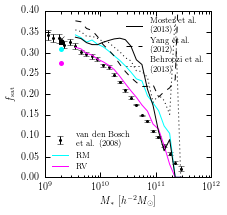

In [75]:
#examine the satellite fraction as a function of stellar mass

def f_sat_mstar_dep(mock):
    """
    satellite fraction as a function of stellar mass
    """

    cens = (mock['halo_upid']==-1)
    sats = (mock['halo_upid']!=-1)

    bins = np.arange(9.5,11.6,0.1)
    bins = 10.0**bins
    bin_centers = (bins[:-1]+bins[1:])/2.0

    n_sat = np.histogram(mock['stellar_mass'][sats],bins=bins)[0]
    n = np.histogram(mock['stellar_mass'],bins=bins)[0]
    f_sat = 1.0*n_sat/n
    
    return f_sat, bin_centers

f_sat_11, bin_centers = f_sat_mstar_dep(mock_11)
f_sat_22, bin_centers = f_sat_mstar_dep(mock_21)
f_sat_33, bin_centers = f_sat_mstar_dep(mock_32)
f_sat_44, bin_centers = f_sat_mstar_dep(mock_42)
f_sat_55, bin_centers = f_sat_mstar_dep(mock_52)

f_sat_1 = float(np.sum(mock_11['halo_upid']!=-1))/len(mock_11)
f_sat_2 = float(np.sum(mock_21['halo_upid']!=-1))/len(mock_21)
f_sat_3 = float(np.sum(mock_32['halo_upid']!=-1))/len(mock_32)
f_sat_4 = float(np.sum(mock_42['halo_upid']!=-1))/len(mock_42)
f_sat_5 = float(np.sum(mock_52['halo_upid']!=-1))/len(mock_52)

f_sat_sdss = np.array([31.4,33.0,34.2,33.5,33.4,31.9,32.5,31.5,30.1,\
              29.7,29.1,28.5,26.9,26.5,24.7,22.9,20.9,19.2,\
             17.5,14.9,13.6,11.1,9.7,7.6,5.7,3.5,2.1])/100.0
f_sat_sdss_err = np.array([1.1,1.3,1.2,1.0,1.1,0.8,0.7,0.7,0.5,0.5,0.6,\
                  0.4,0.4,0.4,0.3,0.2,0.3,0.3,0.2,0.2,0.2,0.3,\
                  0.3,0.3,0.3,0.4,0.6])/100.0
m_sdss = 10**np.arange(8.85,11.46,0.1)

    
fig = plt.figure(figsize=(3.3,3.3))
ax = fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
p0 = plt.errorbar(m_sdss,f_sat_sdss,yerr=f_sat_sdss_err,
                  fmt='o', color='black', ms=3, mec='none')
p1, = plt.plot(bin_centers, f_sat_11, '-', color='cyan')
plt.plot([2*10**9],[f_sat_1],'o',color='cyan', mec='none', ms=5)
p2, = plt.plot(bin_centers, f_sat_22, '-', color='magenta')
plt.plot([2*10**9],[f_sat_2],'o',color='magenta', mec='none', ms=5)
p3, = plt.plot(bin_centers, f_sat_33, '-', color='black')
plt.plot([2*10**9],[f_sat_3],'x',color='black', ms=5)
p4, = plt.plot(bin_centers, f_sat_44, '--', color='black')
plt.plot([2*10**9],[f_sat_4],'s',color='black', mec='none', ms=5)
p5, = plt.plot(bin_centers, f_sat_55, ':',  color='black')
plt.plot([2*10**9],[f_sat_5],'p',color='black', mec='none', ms=5)
plt.xscale('log')
plt.xlim([10**9.0,10.0**12.0])
plt.ylim([0,0.4])
plt.xlabel(r'$M_{*}~[h^{-2}M_{\odot}]$')
plt.ylabel(r'$f_{\rm sat}$')

#add legends
first_legend = plt.legend((p0,p1,p2),
     ('van den Bosch\n et al. (2008)','RM','RV'),
     frameon = False, fontsize=8, loc='lower left',
     numpoints=1, handletextpad=1)
ax = plt.gca().add_artist(first_legend)
plt.legend((p3,p4,p5),
     ('Moster et al.\n (2013)','Yang et al.\n (2012)','Behroozi et al.\n (2013)'),
     frameon = False, fontsize=8, loc='upper right',
     numpoints=1, handletextpad=1)

plt.show()

In [50]:
#define rp bins
rp_bins = np.logspace(-2.0,1.4,25)
rp_bin_centers = (rp_bins[:-1]+rp_bins[1:])/2.0

#create arrays to store results for each mock
wp_12 = np.zeros((3,24))
wp_22 = np.zeros((3,24))
wp_32 = np.zeros((3,24))
wp_42 = np.zeros((3,24))
wp_52 = np.zeros((3,24))

wp_12[0] = calculate_wp(mock_11, rp_bins, pi_max=40.0, Lbox=halocat.Lbox,
                    log_mstar_min=9.5, log_mstar_max =10.0)
wp_22[0] = calculate_wp(mock_21, rp_bins, pi_max=40.0, Lbox=halocat.Lbox,
                    log_mstar_min=9.5, log_mstar_max =10.0)
wp_32[0] = calculate_wp(mock_32, rp_bins, pi_max=40.0, Lbox=halocat.Lbox,
                    log_mstar_min=9.5, log_mstar_max =10.0)
wp_42[0] = calculate_wp(mock_42, rp_bins, pi_max=40.0, Lbox=halocat.Lbox,
                    log_mstar_min=9.5, log_mstar_max =10.0)
wp_52[0] = calculate_wp(mock_52, rp_bins, pi_max=40.0, Lbox=halocat.Lbox,
                    log_mstar_min=9.5, log_mstar_max =10.0)

wp_12[1] = calculate_wp(mock_11, rp_bins, pi_max=40.0, Lbox=halocat.Lbox,
                    log_mstar_min=10.0, log_mstar_max =10.5)
wp_22[1] = calculate_wp(mock_21, rp_bins, pi_max=40.0, Lbox=halocat.Lbox,
                    log_mstar_min=10.0, log_mstar_max =10.5)
wp_32[1] = calculate_wp(mock_32, rp_bins, pi_max=40.0, Lbox=halocat.Lbox,
                    log_mstar_min=10.0, log_mstar_max =10.5)
wp_42[1] = calculate_wp(mock_42, rp_bins, pi_max=40.0, Lbox=halocat.Lbox,
                    log_mstar_min=10.0, log_mstar_max =10.5)
wp_52[1] = calculate_wp(mock_52, rp_bins, pi_max=40.0, Lbox=halocat.Lbox,
                    log_mstar_min=10.0, log_mstar_max =10.5)

wp_12[2] = calculate_wp(mock_11, rp_bins, pi_max=40.0, Lbox=halocat.Lbox,
                    log_mstar_min=10.5, log_mstar_max =11.0)
wp_22[2] = calculate_wp(mock_21, rp_bins, pi_max=40.0, Lbox=halocat.Lbox,
                    log_mstar_min=10.5, log_mstar_max =11.0)
wp_32[2] = calculate_wp(mock_32, rp_bins, pi_max=40.0, Lbox=halocat.Lbox,
                    log_mstar_min=10.5, log_mstar_max =11.0)
wp_42[2] = calculate_wp(mock_42, rp_bins, pi_max=40.0, Lbox=halocat.Lbox,
                    log_mstar_min=10.5, log_mstar_max =11.0)
wp_52[2] = calculate_wp(mock_52, rp_bins, pi_max=40.0, Lbox=halocat.Lbox,
                    log_mstar_min=10.5, log_mstar_max =11.0)

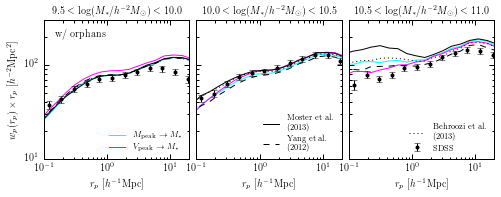

In [51]:
#load SDSS results from Yang 2012
from lss_observations import yang_2012_wp

#create arrays to store results

wp_sdss_1, cov = yang_2012_wp(10.0**9.5,10.0**10.0, sample='Mass-limit')
err_1 = np.sqrt(np.diagonal(cov))

wp_sdss_2, cov = yang_2012_wp(10.0**10.0,10.0**10.5, sample='Mass-limit')
err_2 = np.sqrt(np.diagonal(cov))

wp_sdss_3, cov = yang_2012_wp(10.0**10.5,10.0**11.0, sample='Mass-limit')
err_3 = np.sqrt(np.diagonal(cov))

#plot results

fig, axes = plt.subplots(nrows=1,ncols=3,sharex=True,sharey=True,figsize=(6.95, 2.75))
fig.subplots_adjust(hspace=0, wspace=0.05, left=0.075, right=0.975, bottom=0.2, top=0.9)
    
ax = axes[0]
ax.set_xlim([0.1,20])
ax.set_ylim([10,300])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r'$w_p(r_p) \times r_p ~ [h^{-2}{\rm Mpc}^2]$')
ax.set_xlabel(r'$r_p~[h^{-1}{\rm Mpc}]$')
ax.set_title(r'$9.5<\log(M_{*}/h^{-2}M_{\odot})<10.0$')
    
ax = axes[1]
ax.set_xlim([0.1,20])
ax.set_ylim([10,300])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$r_p~[h^{-1}{\rm Mpc}]$')
ax.set_title(r'$10.0<\log(M_{*}/h^{-2}M_{\odot})<10.5$')
    
ax = axes[2]
ax.set_xlim([0.1,20])
ax.set_ylim([10,300])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$r_p~[h^{-1}{\rm Mpc}]$')
ax.set_title(r'$10.5<\log(M_{*}/h^{-2}M_{\odot})<11.0$')

ax = axes[0]
p1, = ax.plot(rp_bin_centers, wp_12[0]*rp_bin_centers, '-', color='cyan', alpha=1)
p2, = ax.plot(rp_bin_centers, wp_22[0]*rp_bin_centers, '-', color='magenta', alpha=1)
p3, = ax.plot(rp_bin_centers, wp_32[0]*rp_bin_centers, '-', color='black', alpha=1)
p4, = ax.plot(rp_bin_centers, wp_42[0]*rp_bin_centers, '--', color='black', alpha=1)
p5, = ax.plot(rp_bin_centers, wp_52[0]*rp_bin_centers, ':', color='black', alpha=1)
p0 = ax.errorbar(wp_sdss_1[0,:], wp_sdss_1[1,:]*wp_sdss_1[0,:], yerr=err_1*wp_sdss_1[0,:],
                  fmt='o', color='black', ms=4, mec='none')

ax = axes[1]
p1, = ax.plot(rp_bin_centers, wp_12[1]*rp_bin_centers, '-', color='cyan', alpha=1)
p2, = ax.plot(rp_bin_centers, wp_22[1]*rp_bin_centers, '-', color='magenta', alpha=1)
p3, = ax.plot(rp_bin_centers, wp_32[1]*rp_bin_centers, '-', color='black', alpha=1)
p4, = ax.plot(rp_bin_centers, wp_42[1]*rp_bin_centers, '--', color='black', alpha=1)
p5, = ax.plot(rp_bin_centers, wp_52[1]*rp_bin_centers, ':', color='black', alpha=1)
p0 = ax.errorbar(wp_sdss_2[0,:], wp_sdss_2[1,:]*wp_sdss_2[0,:], yerr=err_2*wp_sdss_2[0,:],
                  fmt='o', color='black', ms=4, mec='none')

ax = axes[2]
p1, = ax.plot(rp_bin_centers, wp_12[2]*rp_bin_centers, '-', color='cyan', alpha=1)
p2, = ax.plot(rp_bin_centers, wp_22[2]*rp_bin_centers, '-', color='magenta', alpha=1)
p3, = ax.plot(rp_bin_centers, wp_32[2]*rp_bin_centers, '-', color='black', alpha=1)
p4, = ax.plot(rp_bin_centers, wp_42[2]*rp_bin_centers, '--', color='black', alpha=1)
p5, = ax.plot(rp_bin_centers, wp_52[2]*rp_bin_centers, ':', color='black', alpha=1)
p0 = ax.errorbar(wp_sdss_3[0,:], wp_sdss_3[1,:]*wp_sdss_3[0,:], yerr=err_3*wp_sdss_3[0,:],
                  fmt='o', color='black', ms=4, mec='none')

#add legends
ax = axes[0]
ax.legend((p1,p2),
     (r'$M_{\rm peak} \rightarrow M_*$',r'$V_{\rm peak} \rightarrow M_*$'),
     frameon = False, fontsize=8, loc='lower right', numpoints=1, handletextpad=1)

ax = axes[1]
ax.legend((p3,p4,p5,p0),
    ('Moster et al.\n (2013)','Yang et al.\n (2012)'),
    frameon = False, fontsize=8, loc='lower right', numpoints=1, handletextpad=1)

ax = axes[2]
ax.legend((p5,p0),
    ('Behroozi et al.\n (2013)', 'SDSS'),
    frameon = False, fontsize=8, loc='lower right', numpoints=1, handletextpad=1)

ax = axes[0]
ax.text(0.15,200,'w/ orphans')

plt.show()